In [466]:
###### algunas cosas cambian si pongo como comentarios en el import de geoviews y hvplot (liberias conflictivas?)
import logging
import os
import pypsa
import pandas as pd
import networkx as nx

# plotting stuff
import matplotlib.pyplot as plt

plt.style.use("bmh")
import seaborn as sns  ###
from itertools import product
logger = logging.getLogger(__name__)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", 70)
import sys
sys.path.append("../")  # to import helpers
from scripts._helpers import sets_path_to_root
sets_path_to_root("pypsa-earth")

max_node_size = 1.0  # maximum size of a node for plotting purposes [used in plots]

# utility function for nice plotting

def normalize_node_size(values, max_node_size=max_node_size):
    return values / values.max() * max_node_size

This is the repository path:  c:\Users\Carlos\Desktop\PyPSA-BO\pypsa-earth
Had to go 0 folder(s) up.


# Load networks from pypsa

In [467]:
solved_network_BAU = r"C:\Users\Carlos\Desktop\PyPSA-BO\pypsa-earth\Result_analysis\GCAM-PyPSA_Scenarios\BAU\elec_s_22_ec_lcopt_Co2L-1H.nc"
solved_network_red20 = r"C:\Users\Carlos\Desktop\PyPSA-BO\pypsa-earth\Result_analysis\GCAM-PyPSA_Scenarios\red20\elec_s_22_ec_lcopt_Co2L-1H.nc"
solved_network_red40 = r"C:\Users\Carlos\Desktop\PyPSA-BO\pypsa-earth\Result_analysis\GCAM-PyPSA_Scenarios\red40\elec_s_22_ec_lcopt_Co2L-1H.nc"
solved_network_red60 = r"C:\Users\Carlos\Desktop\PyPSA-BO\pypsa-earth\Result_analysis\GCAM-PyPSA_Scenarios\red60\elec_s_22_ec_lcopt_Co2L-1H.nc"
solved_network_red80 = r"C:\Users\Carlos\Desktop\PyPSA-BO\pypsa-earth\Result_analysis\GCAM-PyPSA_Scenarios\red80\elec_s_22_ec_lcopt_Co2L-1H.nc"
solved_network_red100 = r"C:\Users\Carlos\Desktop\PyPSA-BO\pypsa-earth\Result_analysis\GCAM-PyPSA_Scenarios\red100\elec_s_22_ec_lcopt_Co2L-1H.nc"

n_solve_BAU = pypsa.Network(solved_network_BAU)
n_solve_red20 = pypsa.Network(solved_network_red20)
n_solve_red40 = pypsa.Network(solved_network_red40)
n_solve_red60 = pypsa.Network(solved_network_red60)
n_solve_red80 = pypsa.Network(solved_network_red80)
n_solve_red100 = pypsa.Network(solved_network_red100)


c:\Users\Carlos\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\Carlos\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  attrs.loc[bool_b, "default"] = attrs.loc[bool_b].isin({True, "True"})
c:\Users\Carlos\anaconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:318: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatibl

# Data with GCAM-Bolivia results

In [468]:
# Define the data as a dictionary
data_GCAM_capacity = {
    "Scenario": [
        "BAU", "BAU", "BAU", "BAU", "BAU", "BAU", "BAU", "BAU", "BAU",
        "Red20", "Red20", "Red20", "Red20", "Red20", "Red20", "Red20", "Red20", "Red20",
        "Red40", "Red40", "Red40", "Red40", "Red40", "Red40", "Red40", "Red40", "Red40",
        "Red60", "Red60", "Red60", "Red60", "Red60", "Red60", "Red60", "Red60", "Red60",
        "Red80", "Red80", "Red80", "Red80", "Red80", "Red80", "Red80", "Red80", "Red80",
        "Red100", "Red100", "Red100", "Red100", "Red100", "Red100", "Red100", "Red100", "Red100"
    ],
    "Sector": [
        "Biomass", "Coal", "Gas", "Geothermal", "Hydro", "Liquids", "Nuclear", "Solar", "Wind",
        "Biomass", "Coal", "Gas", "Geothermal", "Hydro", "Liquids", "Nuclear", "Solar", "Wind",
        "Biomass", "Coal", "Gas", "Geothermal", "Hydro", "Liquids", "Nuclear", "Solar", "Wind",
        "Biomass", "Coal", "Gas", "Geothermal", "Hydro", "Liquids", "Nuclear", "Solar", "Wind",
        "Biomass", "Coal", "Gas", "Geothermal", "Hydro", "Liquids", "Nuclear", "Solar", "Wind",
        "Biomass", "Coal", "Gas", "Geothermal", "Hydro", "Liquids", "Nuclear", "Solar", "Wind"
    ],
    "2021-2025": [
        0.051538868, 0, 0.367880665, 0.082515644, 0, 0.036873563, 0.02941907, 0.996550171, 0.110267675,
        0.05042258, 0, 0.369066809, 0.082757166, 0, 0.037051075, 0.029514551, 0.997737985, 0.110619299,
        0.050422658, 0, 0.369065922, 0.082756814, 0, 0.037050979, 0.029514509, 0.997736765, 0.11061914,
        0.050422494, 0, 0.369066002, 0.082757166, 0, 0.037050979, 0.029514509, 0.997736765, 0.11061914,
        0.050415531, 0, 0.369053735, 0.082755052, 0, 0.03705055, 0.029513734, 0.997712797, 0.110616438,
        0.050422531, 0, 0.369065922, 0.082756814, 0, 0.037050983, 0.029514509, 0.997736765, 0.11061914
    ],
    "2026-2030": [
        0.042681804, 0, 0.37908518, 0.096854952, 0, 0.031899321, 0.036179492, 0.898541744, 0.111669554,
        0.010627597, 0, 0.417144846, 0.111660924, 0, 0.035290947, 0.042401344, 0.963653268, 0.130798979,
        0.010625386, 0, 0.417151409, 0.111660959, 0, 0.035290729, 0.042401703, 0.963657024, 0.130799138,
        0.010620539, 0, 0.417165271, 0.111661805, 0, 0.035290332, 0.04240171, 0.963665683, 0.130799934,
        0.01062142, 0, 0.417135284, 0.11165733, 0, 0.03529051, 0.04239985, 0.963619506, 0.130793729,
        0.010624601, 0, 0.417153513, 0.111661382, 0, 0.035290687, 0.042401707, 0.963658037, 0.130799456
    ],
    "2031-2035": [
        0.044954435, 0, 0.472405527, 0.108191379, 0, 0.037014768, 0.045025548, 0.9903025, 0.141668696,
        0.026298967, 0, 0.433016919, 0.154233645, 0, 0.040995047, 0.068515608, 1.186914503, 0.213647298,
        0.031285493, 0, 0.332124195, 0.208411903, 0, 0.041878067, 0.09883011, 1.417166276, 0.301158029,
        0.0379336, 0, 0.117877311, 0.230112323, 0, 0.04182338, 0.143224932, 1.7177538, 0.420943367,
        0.044938206, 0, -0.135759334, 0.230137691, 0, 0.045861967, 0.208898508, 2.079871365, 0.576471525,
        0.053532658, 0, -0.31359969, 0.230171163, 0, 0.046551918, 0.299450857, 2.504590933, 0.758980959
    ],
    "2036-2040": [
        0.046435069, 0, 0.555491381, 0.115357017, 0, 0.043577051, 0.053128495, 1.184865928, 0.160268672,
        0.02711852, 0, 0.406484927, 0.076372012, 0, 0.044096784, 0.098460846, 1.650077668, 0.289552956,
        0.034267349, 0, 0.323810141, 0.033891496, 0, 0.044289407, 0.182509175, 2.357776665, 0.493191607,
        0.048256296, 0, 0.224194676, 0.034778278, 0, 0.044923727, 0.339650171, 3.275388135, 0.793799595,
        0.061155182, 0, 0.049063766, 0.047919873, 0, 0.044998237, 0.598085398, 4.283036528, 1.140777684,
        0.052868728, 0, -0.145130757, 0.063344855, 0, 0.033861344, 0.899359287, 5.1861703, 1.466663497
    ],
    "2041-2045": [
        0.044400699, 0, 0.584949608, 0.029276559, 0, 0.046592678, 0.05549449, 1.324364332, 0.165555879,
        0.029465905, 0, 0.402417796, 0.024800651, 0, 0.051629494, 0.142052018, 2.417068603, 0.401456716,
        0.035087727, 0, 0.336815015, 0.03274177, 0, 0.053180334, 0.313051434, 3.708576262, 0.74057964,
        0.029428069, 0, 0.13057631, 0.043719735, 0, 0.046760319, 0.585496858, 5.059841415, 1.105201041,
        -0.007009709, 0, -0.000487532, 0.061340725, 0, 0.02716693, 0.937831298, 6.329562512, 1.481586442,
        -0.022514847, 0, 0.003959856, 0.091856045, 0, -0.005766926, 1.535561617, 8.742931118, 2.06020009
    ],
    "2046-2050": [
        0.049558296, 0, 0.672787064, 0.02314237, 0, 0.056980544, 0.065062863, 1.647681283, 0.195509989,
        0.016320305, 0, 0.363485626, 0.025788094, 0, 0.076541757, 0.199932043, 3.454264573, 0.541703324,
        0.014577512, 0, 0.294632642, 0.038962878, 0, 0.071283926, 0.447896091, 5.254403585, 0.948083778,
        0.003716135, 0, 0.087365418, 0.05144202, 0, 0.046639779, 0.727142349, 6.724475734, 1.279734749,
        -0.007652645, 0, 0.042117252, 0.081122844, 0, -0.001390869, 1.250367799, 9.336166484, 1.854662451,
        -0.006424356, 0, 0.000169701, 0.092181176, 0, -0.010935175, 1.414270359, 9.803143929, 0.76656583
    ]
}

# Create the DataFrame
df_GCAM_capacity = pd.DataFrame(data_GCAM_capacity)
df_GCAM_capacity


,Scenario,Sector,2021-2025,2026-2030,2031-2035,2036-2040,2041-2045,2046-2050
0,BAU,Biomass,0.051539,0.042682,0.044954,0.046435,0.044401,0.049558
1,BAU,Coal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,BAU,Gas,0.367881,0.379085,0.472406,0.555491,0.584950,0.672787
3,BAU,Geothermal,0.082516,0.096855,0.108191,0.115357,0.029277,0.023142
4,BAU,Hydro,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,BAU,Liquids,0.036874,0.031899,0.037015,0.043577,0.046593,0.056981
6,BAU,Nuclear,0.029419,0.036179,0.045026,0.053128,0.055494,0.065063
7,BAU,Solar,0.996550,0.898542,0.990302,1.184866,1.324364,1.647681
8,BAU,Wind,0.110268,0.111670,0.141669,0.160269,0.165556,0.195510
9,Red20,Biomass,0.050423,0.010628,0.026299,0.027119,0.029466,0.016320


In [469]:
data = {
    'Technology': ['Biomass', 'Gas', 'Geothermal', 'Hydro', 'Liquids', 'Nuclear', 'Solar', 'Wind', 'Total'],
    'BAU': [1.661002778, 22.79725, 3.385, 2.939305556, 0.646686111, 2.241486111, 13.48164178, 1.550415694, 48.70278803],
    'Red20': [0.1940425, 13.12287778, 3.385, 2.939305556, 0.834450278, 4.579638889, 19.64194122, 2.956988056, 47.65424428],
    'Red40': [0.157894722, 6.589375, 3.385, 2.939305556, 0.5965425, 8.784388889, 27.68515367, 4.773203689, 54.91086403],
    'Red60': [0.102142222, 1.963080278, 3.385, 2.939305556, 0.355927278, 14.72280556, 37.01638506, 6.729603383, 67.21424934],
    'Red80': [0.028663639, 0.318343389, 3.385, 2.939305556, 0.099025222, 24.18091667, 50.43500147, 9.276679281, 90.66293523],
    'Red100': [0.000138129, 0.001258824, 3.385, 2.939305556, 0.000528501, 33.27472222, 62.32063153, 9.274788353, 111.1963731]
}

# Convert to DataFrame
df_GCAM_production = pd.DataFrame(data)

# Replace commas with dots and convert to float
df_GCAM_production.set_index('Technology', inplace=True)
df_GCAM_production

,BAU,Red20,Red40,Red60,Red80,Red100
Technology,,,,,,
Biomass,1.661003,0.194043,0.157895,0.102142,0.028664,0.000138
Gas,22.797250,13.122878,6.589375,1.963080,0.318343,0.001259
Geothermal,3.385000,3.385000,3.385000,3.385000,3.385000,3.385000
Hydro,2.939306,2.939306,2.939306,2.939306,2.939306,2.939306
Liquids,0.646686,0.834450,0.596542,0.355927,0.099025,0.000529
Nuclear,2.241486,4.579639,8.784389,14.722806,24.180917,33.274722
Solar,13.481642,19.641941,27.685154,37.016385,50.435001,62.320632
Wind,1.550416,2.956988,4.773204,6.729603,9.276679,9.274788
Total,48.702788,47.654244,54.910864,67.214249,90.662935,111.196373


# Scenario definition

In [470]:
#scenario definition for pypsa (n_solve_bau, n_solve_red20, n_solve_red40, n_solve_red60, n_solve_red4=80, n_solve_red100) and gcam (BAU, Red20, Red40, Red60, Red80, Red100)
scenario_pypsa = n_solve_red100
scenario_gcam = 'Red100'

In [471]:
scenario_pypsa.statistics.installed_capacity()

             carrier           
StorageUnit  Reservoir & Dam       3.546900e+02
Store        Battery Storage       0.000000e+00
             Hydrogen Storage      0.000000e+00
Line         AC                    1.757536e+04
Generator    Biomass               9.900000e+01
             Combined-Cycle Gas    1.236030e+02
             Geothermal            5.500000e+01
             Oil                   1.000000e-03
             Onshore Wind          4.500000e+01
             Open-Cycle Gas        2.000000e-03
             Run of River          3.212600e+02
             Solar                 1.004000e+02
             load                  2.200000e+10
Link         H2 electrolysis       0.000000e+00
             H2 fuel cell          0.000000e+00
             battery charger       0.000000e+00
             battery discharger    0.000000e+00
dtype: float64

# Capacity comparison for 2050 (i.e. Scenario red40)

In [472]:
#selecting generation capacities from statistics in pypsa for a particular scenario "n_solve_red40"
capacities_pypsa = pd.DataFrame(scenario_pypsa.statistics.optimal_capacity() - scenario_pypsa.statistics.installed_capacity())

capacities_pypsa = capacities_pypsa.drop(index=['Line','Load','Store'], level=0)
capacities_pypsa = capacities_pypsa.reset_index(level=0, drop=True)
capacities_pypsa.rename(columns={0:"MW - PyPSA-BO"}, inplace=True)
capacities_pypsa.index.name = "Technology"
capacities_pypsa = capacities_pypsa.drop(index=['load'])
capacities_pypsa = capacities_pypsa.drop(index=['battery charger'])
capacities_pypsa = capacities_pypsa.drop(index=['H2 electrolysis'])


capacities_pypsa

,MW - PyPSA-BO
Technology,
Reservoir & Dam,0.000000
Biomass,1693.999738
Combined-Cycle Gas,266.900474
Geothermal,370.239453
Oil,140.208828
Onshore Wind,4.623528
Open-Cycle Gas,8.805167
Run of River,0.000000
Solar,63185.337157


In [473]:
#reformating outputs from GCAM for analyzing a scenario "Red40"
capacities_gcam = df_GCAM_capacity.loc[df_GCAM_capacity['Scenario'] == scenario_gcam, ['Sector','2046-2050']]
capacities_gcam.rename(columns={'2046-2050': 'MW - GCAM-Bolivia'}, inplace=True)
capacities_gcam['MW - GCAM-Bolivia'] = capacities_gcam['MW - GCAM-Bolivia']*1000
capacities_gcam.rename(columns={'Sector': 'Technology'}, inplace=True)
capacities_gcam.set_index('Technology', inplace=True)

capacities_gcam

,MW - GCAM-Bolivia
Technology,
Biomass,-6.424356
Coal,0.000000
Gas,0.169701
Geothermal,92.181176
Hydro,0.000000
Liquids,-10.935175
Nuclear,1414.270359
Solar,9803.143929
Wind,766.565830


In [474]:
#formating and merging both sets of capacities for comparison
capacities_pypsa.loc['Hydro'] = capacities_pypsa.loc['Reservoir & Dam'] + capacities_pypsa.loc['Run of River']
capacities_pypsa.loc['Gas'] = capacities_pypsa.loc['Combined-Cycle Gas'] + capacities_pypsa.loc['Open-Cycle Gas']
capacities_pypsa.drop(index='Reservoir & Dam', inplace=True)
capacities_pypsa.drop(index='Run of River', inplace=True)
capacities_pypsa.drop(index='Combined-Cycle Gas', inplace=True)
capacities_pypsa.drop(index='Open-Cycle Gas', inplace=True)

capacities_gcam.rename(index={'Liquids':"Oil"},inplace=True)
capacities_gcam.rename(index={'Wind':"Onshore Wind"},inplace=True)

combined_capacities = pd.concat([capacities_pypsa, capacities_gcam], axis=1)
combined_capacities

,MW - PyPSA-BO,MW - GCAM-Bolivia
Technology,,
Biomass,1693.999738,-6.424356
Geothermal,370.239453,92.181176
Oil,140.208828,-10.935175
Onshore Wind,4.623528,766.565830
Solar,63185.337157,9803.143929
H2 fuel cell,5186.090190,NaN
battery discharger,21796.744068,NaN
Hydro,0.000000,0.000000
Gas,275.705641,0.169701


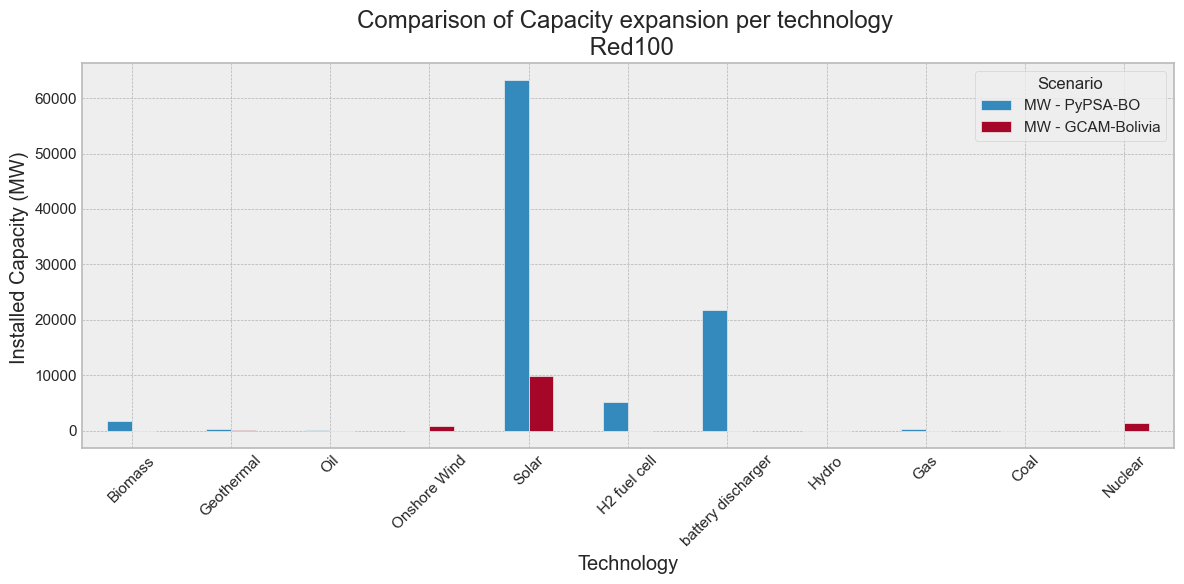

In [475]:
# Plotting
ax = combined_capacities.plot(kind='bar', figsize=(12, 6))

# Set plot title and labels
ax.set_title(f'Comparison of Capacity expansion per technology \n {str(scenario_gcam)}')
ax.set_xlabel('Technology')
ax.set_ylabel('Installed Capacity (MW) ')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Scenario')

# Display the plot
plt.tight_layout()
plt.show()

In [476]:
#adding color code
OCGT_color='lightcoral'
CCGT_color='indianred'
Onwind_color='#ff8200'
Solar_color='gold'
ror_color='lightsteelblue'
reservoir_color='steelblue'
H2_color='darkgoldenrod'
battery_color='tan'
oil_color='grey'
biomass_color='#73A917'
demand_color='slategrey'
geothermal_color = 'purple'
coal_color = 'black'
nuclear_color = 'slategrey'

# Other parameters

In [477]:
storage_capacities = pd.DataFrame(scenario_pypsa.statistics.optimal_capacity())
storage_capacities = storage_capacities.drop(index=['Line','Generator','StorageUnit'], level=0)
storage_capacities

0
      carrier                          
Store Battery Storage     120246.440498
      Hydrogen Storage    243234.572903
Link  H2 electrolysis       7181.687549
      H2 fuel cell          5186.090190
      battery charger      19617.069661
      battery discharger   21796.744068

# Production comparison

In [478]:
#selecting production from statistics
production_pypsa = pd.DataFrame(scenario_pypsa.statistics.dispatch())
production_pypsa = production_pypsa.drop(index=['Line','Load','Link','Store'], level=0)
production_pypsa = production_pypsa.reset_index(level=0, drop=True)
production_pypsa.rename(columns={0:"TWh - PyPSA-BO"}, inplace=True)
production_pypsa.index.name = "Technology"
production_pypsa = production_pypsa.drop(index=['load'])
production_pypsa['TWh - PyPSA-BO'] = production_pypsa['TWh - PyPSA-BO']/1000000
production_pypsa.loc['Total'] = production_pypsa['TWh - PyPSA-BO'].sum()
production_pypsa

,TWh - PyPSA-BO
Technology,
Reservoir & Dam,1.148450
Biomass,14.391781
Combined-Cycle Gas,0.362413
Geothermal,1.760262
Oil,0.030792
Onshore Wind,0.044124
Open-Cycle Gas,0.005144
Run of River,1.702944
Solar,111.191041


In [479]:
#reformating outputs from GCAM for analyzing a scenario "Red40"
production_gcam = pd.DataFrame(df_GCAM_production[scenario_gcam])
production_gcam.rename(columns={scenario_gcam: 'TWh - GCAM-Bolivia'}, inplace=True)
production_gcam

,TWh - GCAM-Bolivia
Technology,
Biomass,0.000138
Gas,0.001259
Geothermal,3.385000
Hydro,2.939306
Liquids,0.000529
Nuclear,33.274722
Solar,62.320632
Wind,9.274788
Total,111.196373


In [480]:
#formating and merging both sets of capacities for comparison
production_pypsa.loc['Hydro'] = production_pypsa.loc['Reservoir & Dam'] + production_pypsa.loc['Run of River']
production_pypsa.loc['Gas'] = production_pypsa.loc['Combined-Cycle Gas'] + production_pypsa.loc['Open-Cycle Gas']
production_pypsa.drop(index='Reservoir & Dam', inplace=True)
production_pypsa.drop(index='Run of River', inplace=True)
production_pypsa.drop(index='Combined-Cycle Gas', inplace=True)
production_pypsa.drop(index='Open-Cycle Gas', inplace=True)

production_gcam.rename(index={'Liquids':"Oil"},inplace=True)
production_gcam.rename(index={'Wind':"Onshore Wind"},inplace=True)

combined_production = pd.concat([production_pypsa, production_gcam], axis=1)
combined_production.drop(index='Total',inplace=True)
combined_production

,TWh - PyPSA-BO,TWh - GCAM-Bolivia
Technology,,
Biomass,14.391781,0.000138
Geothermal,1.760262,3.385000
Oil,0.030792,0.000529
Onshore Wind,0.044124,9.274788
Solar,111.191041,62.320632
Hydro,2.851394,2.939306
Gas,0.367558,0.001259
Nuclear,NaN,33.274722


In [481]:
combined_production['TWh - PyPSA-BO'].sum()

130.63695197723248

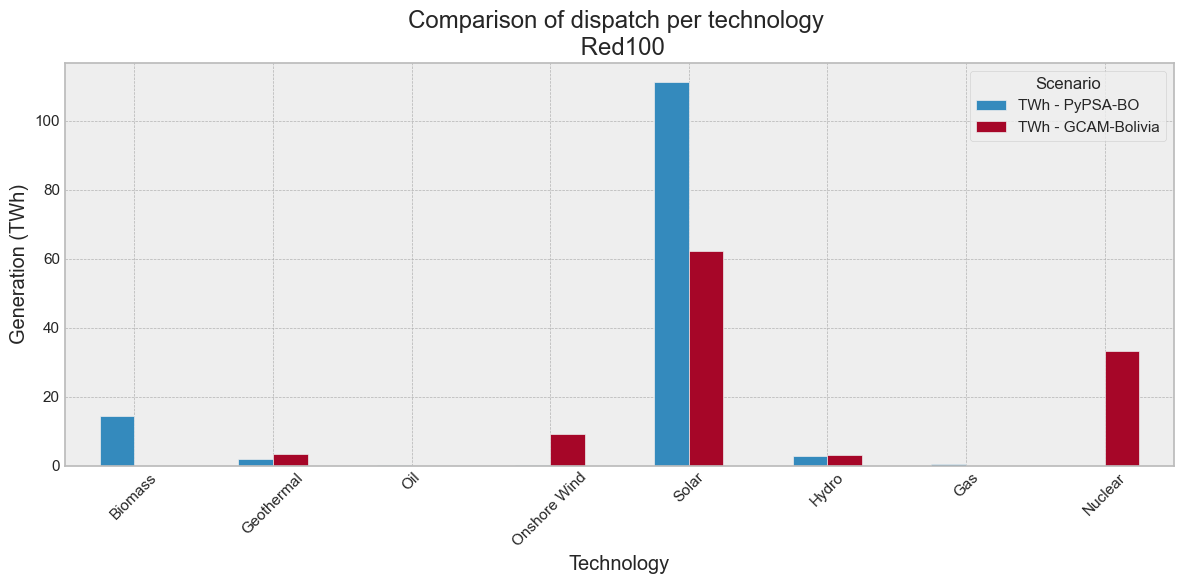

In [482]:
# Plotting
ax = combined_production.plot(kind='bar', figsize=(12, 6))

# Set plot title and labels
ax.set_title(f'Comparison of dispatch per technology \n {str(scenario_gcam)}')
ax.set_xlabel('Technology')
ax.set_ylabel('Generation (TWh)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Scenario')

# Display the plot
plt.tight_layout()
plt.show()

In [483]:
#combined_production.to_excel(r"C:\Users\Carlos\Desktop\production_red100.xlsx")
#combined_capacities.to_excel(r"C:\Users\Carlos\Desktop\capacity_red100.xlsx")